In [119]:
#import all the important libraries required for developing the model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
#reading the dataset with the help of pandas library.
wine_quality = pd.read_csv('C:\\Users\Suyash Pandey\OneDrive\Desktop\wine.csv')

In [121]:
#displaying first five rows of the dataframe using the head command
wine_quality.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [122]:
#Other information of the dataset
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


<AxesSubplot:xlabel='quality', ylabel='count'>

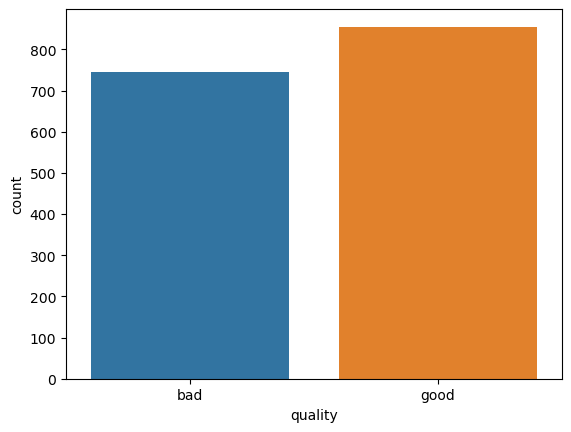

In [123]:
#countplot of seaborn plots the graph that shows the count of a particular attribute
sns.countplot(x = 'quality', data = wine_quality)

<AxesSubplot:>

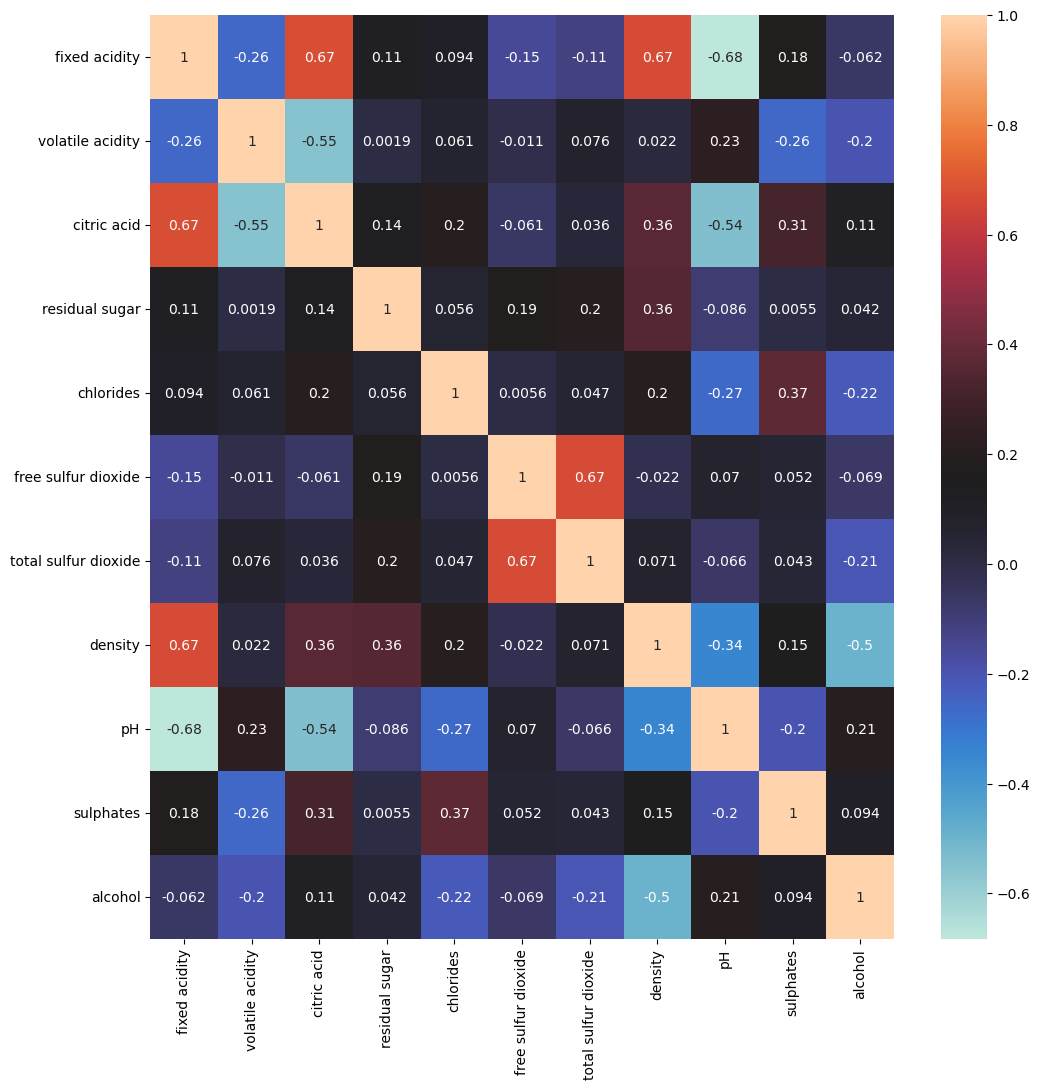

In [124]:
#corr() function shows the correlation between the attributes.
fig,ax = plt.subplots(figsize = (12, 12)) 
sns.heatmap(wine_quality.corr(), data = wine_quality, annot = True, cmap = 'icefire')

In [125]:
#displaying the columns
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [126]:
wine_quality['quality'].replace({'bad':0, 'good':1}, inplace = True)

In [127]:
wine_quality['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [128]:
#features to be selected as predictors, we have to predict quality of wine in this 
#hence we will drop it from the section of predictor variables and it will be assigned to the target variable.
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [129]:
#taking X as predictor and y as target variable.
X = wine_quality[selected_features].drop(labels = {'quality'}, axis = 1)
y = wine_quality['quality']

In [130]:
#displaying the shape of predictor and target variables
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [131]:
#normalizing the dataset using MinMaxScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [132]:
#Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [133]:
#displaying the shape of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [134]:
#imported the LinearRegression algorithm through sklearn and fitted the 
#training dataset into and evaluated the model on the testing set
#As This is a classification problem hence linear regression cannot be used here thats why it is giving very low accuracy
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2848888260533774

In [135]:
#imported the RandomForestClassifier() algorithm through sklearn and fitted the 
#training dataset into and evaluated the model on the testing set
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8125

In [136]:
#imported the DecisionTreeClassifier()  algorithm through sklearn and fitted the 
#training dataset into and evaluated the model on the testing set
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.725

In [137]:
#imported the LogisticRegression() algorithm through sklearn and fitted the 
#training dataset into and evaluated the model on the testing set
model4 = LogisticRegression()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.7375

In [138]:
#imported the KNeighborsClassifier() algorithm through sklearn and fitted the 
#training dataset into and evaluated the model on the testing set
model6 = KNeighborsClassifier()
model6.fit(X_train,y_train)
model6.score(X_test,y_test)

C:\Users\Suyash Pandey\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.684375

In [139]:
#model predicting the value using the testing dataset 
y_predict = model2.predict(X_test)

In [140]:
#predicted value
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [141]:
#checking the predicted values using the testing dataset,greater than 6.5, wine having quality greater than 6.5 is a good wine.
y_predict = (y_predict > 0.5)

In [142]:
#pridicting the values using the training dataset
y_train_predict = model2.predict(X_train)

In [143]:
y_train_predict = (y_train_predict > 0.5)

<AxesSubplot:>

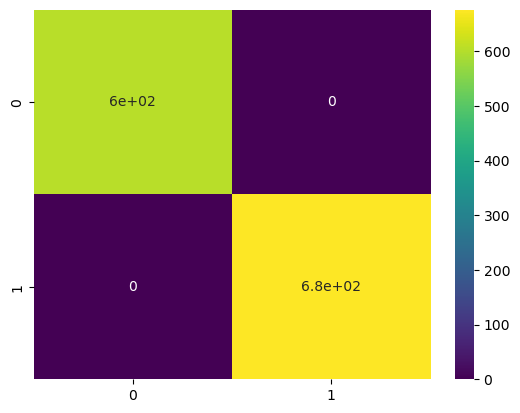

In [144]:
#plotting the confusion matrix for the predicted values of the training dataset.
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm, annot = True, cmap = 'viridis')

<AxesSubplot:>

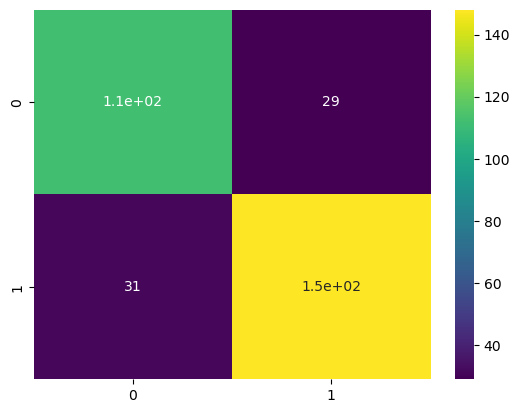

In [145]:
#plotting the confusion matrix for the predicted values of the testing dataset.
from sklearn.metrics import confusion_matrix, classification_report
cm2 = confusion_matrix(y_test,y_predict)
sns.heatmap(cm2, annot = True, cmap = 'viridis')

In [147]:
#Testing and training classification report
print("Training Report:\n", classification_report(y_train,y_train_predict))
print("Testing Report:\n", classification_report(y_test,y_predict))

Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00       676

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

Testing Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.84      0.83      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

